### Problem Statement:

For a given dataset of people with gender, age and genre of music that they prefer to listen to, You have to train a ML model, so that for a new person with a specific age and gender, your model will be able to predict what genre of music he/she will most likely prefer.
The dataset is shared in the csv format.
0 represents female and 1 represents male.

In [1]:
# import require libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset

df=pd.read_csv(r'Downloads\music.csv')

In [3]:
# Showing the record

df.head(20)

,age,gender,genre
0,20,1,HipHop
1,23,1,HipHop
2,25,1,HipHop
3,26,1,Jazz
4,29,1,Jazz
5,30,1,Jazz
6,31,1,Classical
7,33,1,Classical
8,37,1,Classical
9,20,0,Dance


In [4]:
# the shape of the dataset
print('The shape of the dataset: ',df.shape)

The shape of the dataset:  (18, 3)


In [5]:
# Checking datatype of the feature

df.dtypes

age        int64
gender     int64
genre     object
dtype: object

In [6]:
# Basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   age     18 non-null     int64 
 1   gender  18 non-null     int64 
 2   genre   18 non-null     object
dtypes: int64(2), object(1)
memory usage: 560.0+ bytes


In [7]:
# Description about the dataset

df.describe()

,age,gender
count,18.000000,18.000000
mean,27.944444,0.500000
std,5.127460,0.514496
min,20.000000,0.000000
25%,25.000000,0.000000
50%,28.000000,0.500000
75%,31.000000,1.000000
max,37.000000,1.000000


In [8]:
# Checking the null values:

df.isnull().sum()

age       0
gender    0
genre     0
dtype: int64

#### Conclusion:  
    
There is no null value in our dataset.

In [9]:
# Checking Duplicates:

df.duplicated(subset=None,keep='first')

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
dtype: bool

#### Conclusion:  
    
There is no duplicated value in our dataset.

# Exploratory Data Analysis (EDA)

### Data Visualization

<AxesSubplot:xlabel='genre', ylabel='count'>

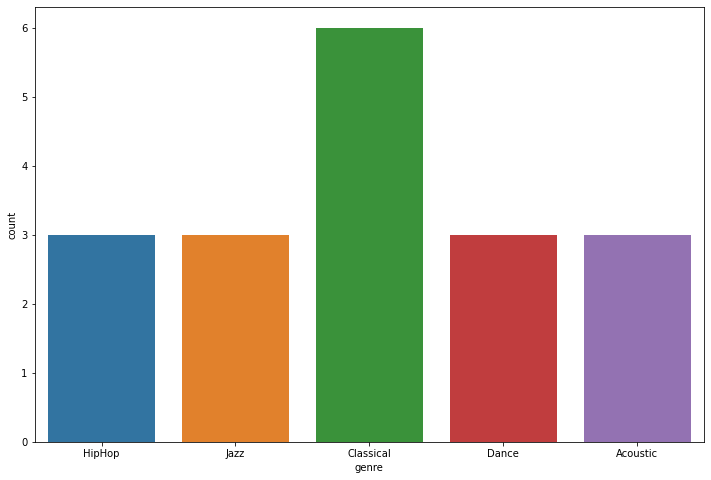

In [10]:
# Countplot of 'Genre'.

plt.figure(figsize=(12,8))
sns.countplot(x='genre',data=df)

#### Result:
    
Maximum people like 'Classifical' music.


<AxesSubplot:xlabel='age', ylabel='Count'>

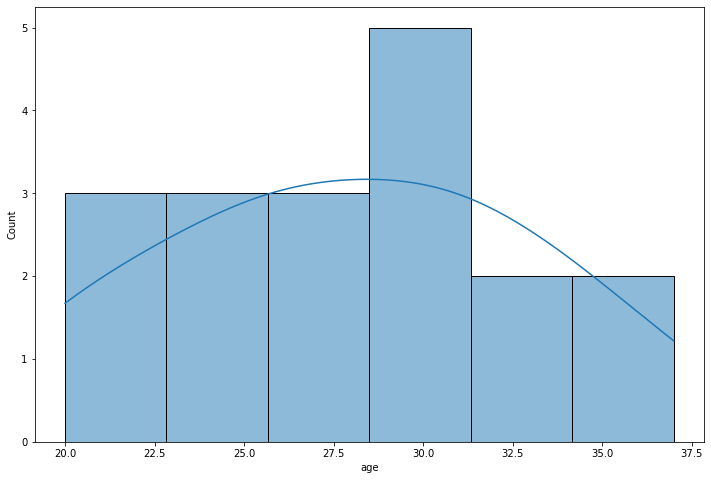

In [11]:
# Histplot of 'Age'.

plt.figure(figsize=(12,8))
sns.histplot(x='age',data=df,kde=True)

#### Result:
    
The 'age' distribution almost looks like normal distribution.

<AxesSubplot:xlabel='genre', ylabel='age'>

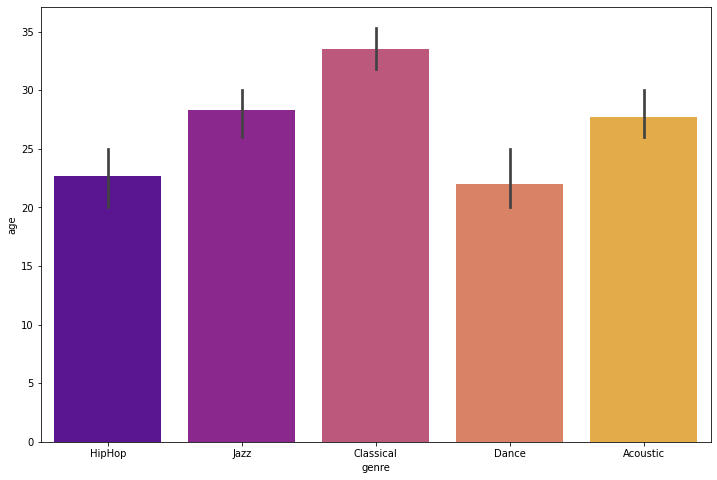

In [12]:
# Age wise genre

plt.figure(figsize=(12,8))
sns.barplot(data=df,x='genre',y='age',palette='plasma')

#### Result:
    
a. above 30 years old people like 'Classical' music.

b. people belong in the age between '25-30' like 'jazz' and 'Acoustic' type music.

c. people belong in the age between '20-25' like 'Hip Hop' and 'Dance' or Disco type music.

<AxesSubplot:>

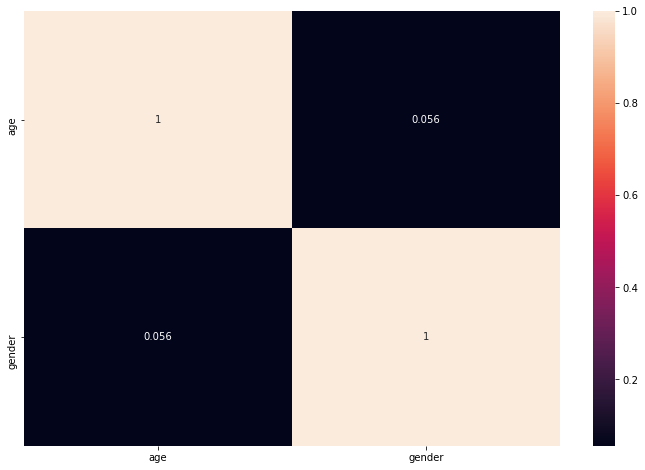

In [13]:
# Correlation matrix

plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [14]:
# Divide the features into dependent feature and independent features

# independent featutes
x=df.drop('genre',axis=1)

# dependent feature
y=df['genre']

In [15]:
x

,age,gender
0,20,1
1,23,1
2,25,1
3,26,1
4,29,1
5,30,1
6,31,1
7,33,1
8,37,1
9,20,0


In [16]:
y

0        HipHop
1        HipHop
2        HipHop
3          Jazz
4          Jazz
5          Jazz
6     Classical
7     Classical
8     Classical
9         Dance
10        Dance
11        Dance
12     Acoustic
13     Acoustic
14     Acoustic
15    Classical
16    Classical
17    Classical
Name: genre, dtype: object

In [17]:
# Apply Train - Test split 

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,) #70% training and 30% test data.

## K-NN classifier:

#### Before applying K-NN classifier model we first see what is the value of K is suitable to correcly predict the genre of music.

Let's go ahead and use the elbow method to pick a good K Value:

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

accuracy_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    score=cross_val_score(knn,x,y,cv=3)
    accuracy_rate.append(score.mean())

Text(0, 0.5, 'Accuracy Rate')

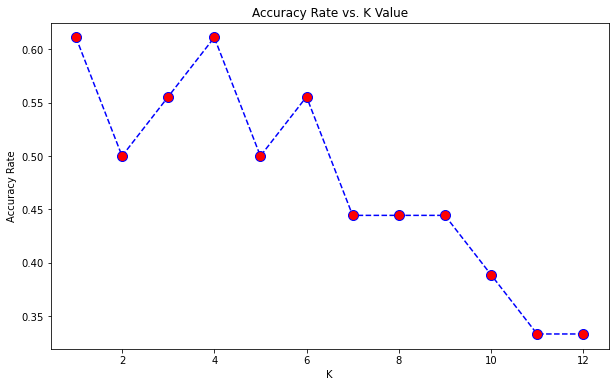

In [19]:
plt.figure(figsize=(10,6))
#plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
        #markerfacecolor='red', markersize=10)
plt.plot(range(1,40),accuracy_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Accuracy Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')

Result:
    
as we can see the graph shows at k=7 the model accuracy will be high and error rate is very less

In [20]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# NOW WITH K=7
knn = KNeighborsClassifier(n_neighbors=7)

knn.fit(x_train,y_train)
pred = knn.predict(x_test)

print('WITH K=7')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=7


[[0 1 0 0 0]
 [0 2 0 0 0]
 [0 0 0 2 0]
 [0 0 0 0 0]
 [1 0 0 0 0]]


              precision    recall  f1-score   support

    Acoustic       0.00      0.00      0.00         1
   Classical       0.67      1.00      0.80         2
       Dance       0.00      0.00      0.00         2
      HipHop       0.00      0.00      0.00         0
        Jazz       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.13      0.20      0.16         6
weighted avg       0.22      0.33      0.27         6



#### Interpretation:
    
As you see the k-nn model not performing well. So we go towards our next classification model that is Decision Tree classfier.

##  Decision Tree Classifier

In [21]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='gini',splitter='best')
dt.fit(x_train,y_train)
pred = knn.predict(x_test)

In [22]:
# checking accuracy , confusion matrix and classification report
print('Model accuracy: ',accuracy_score(y_test,pred))
print('Confusion Matrix: \n',confusion_matrix(y_test,pred))
print('Classification report: \n',classification_report(y_test,pred))

Model accuracy:  0.3333333333333333
Confusion Matrix: 
 [[0 1 0 0 0]
 [0 2 0 0 0]
 [0 0 0 2 0]
 [0 0 0 0 0]
 [1 0 0 0 0]]
Classification report: 
               precision    recall  f1-score   support

    Acoustic       0.00      0.00      0.00         1
   Classical       0.67      1.00      0.80         2
       Dance       0.00      0.00      0.00         2
      HipHop       0.00      0.00      0.00         0
        Jazz       0.00      0.00      0.00         1

    accuracy                           0.33         6
   macro avg       0.13      0.20      0.16         6
weighted avg       0.22      0.33      0.27         6



# Random Forest Classifier

In [23]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier=RandomForestClassifier().fit(x_train,y_train)
prediction=rf_classifier.predict(x_test)

In [24]:
# checking accuracy , confusion matrix and classification report
print('Model accuracy: ',accuracy_score(y_test,prediction))
print('Confusion Matrix: \n',confusion_matrix(y_test,prediction))
print('Classification report: \n',classification_report(y_test,prediction))

Model accuracy:  1.0
Confusion Matrix: 
 [[1 0 0 0]
 [0 2 0 0]
 [0 0 2 0]
 [0 0 0 1]]
Classification report: 
               precision    recall  f1-score   support

    Acoustic       1.00      1.00      1.00         1
   Classical       1.00      1.00      1.00         2
       Dance       1.00      1.00      1.00         2
        Jazz       1.00      1.00      1.00         1

    accuracy                           1.00         6
   macro avg       1.00      1.00      1.00         6
weighted avg       1.00      1.00      1.00         6



Result:
    
The accuracy of the model is 1.00 which means this model is fit for our dataset.

# Extreme Gradient Boosting (XGBoost) classifier

In [25]:
# Extreme Gradient Boosting Classifier
import xgboost as xgb

xg=xgb.XGBClassifier()
xg.fit(x_train,y_train)
prediction=xg.predict(x_test)

[20:47:15] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [26]:
# checking accuracy , confusion matrix and classification report
print('Model accuracy: ',accuracy_score(y_test,prediction))
print('Confusion Matrix: \n',confusion_matrix(y_test,prediction))
print('Classification report: \n',classification_report(y_test,prediction))

Model accuracy:  0.6666666666666666
Confusion Matrix: 
 [[1 0 0 0 0]
 [0 2 0 0 0]
 [0 0 0 2 0]
 [0 0 0 0 0]
 [0 0 0 0 1]]
Classification report: 
               precision    recall  f1-score   support

    Acoustic       1.00      1.00      1.00         1
   Classical       1.00      1.00      1.00         2
       Dance       0.00      0.00      0.00         2
      HipHop       0.00      0.00      0.00         0
        Jazz       1.00      1.00      1.00         1

    accuracy                           0.67         6
   macro avg       0.60      0.60      0.60         6
weighted avg       0.67      0.67      0.67         6



Result:
    
XGBoost classifier accuracy is 0.67 which means not so good for our data.

#### Final Model Selection:  

K-NN classifier model accuracy: 0.33
    
Decision Tree classifier model accuracy: 0.33
    
Random Forest Classifier model accuracy: 1.0
    
XGBoost Classifier model accuracy: 0.67
    
So based on that we choose Random Forest Classifier to predict "Genre" based on 'age' and 'gender'.

# Thank You 